In [135]:
%load_ext autoreload
%autoreload 2

# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pyshtools as pysh
import SLmod as SL
from numpy import pi as pi

#set plotting parameters
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = [16, 8]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


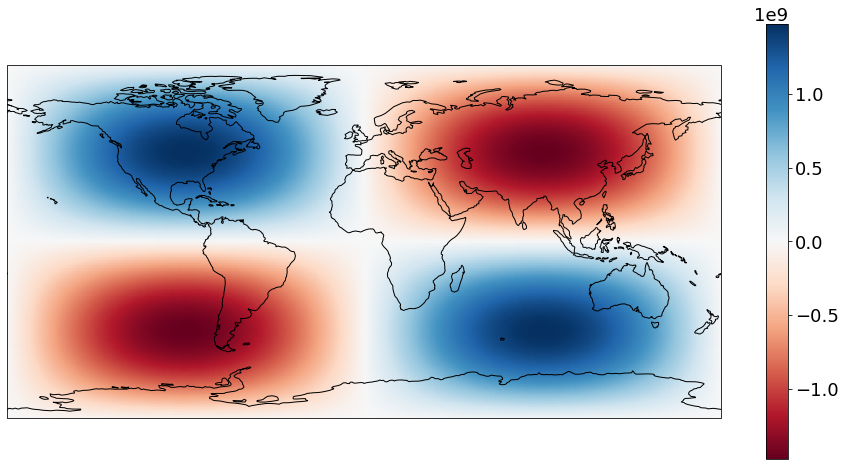

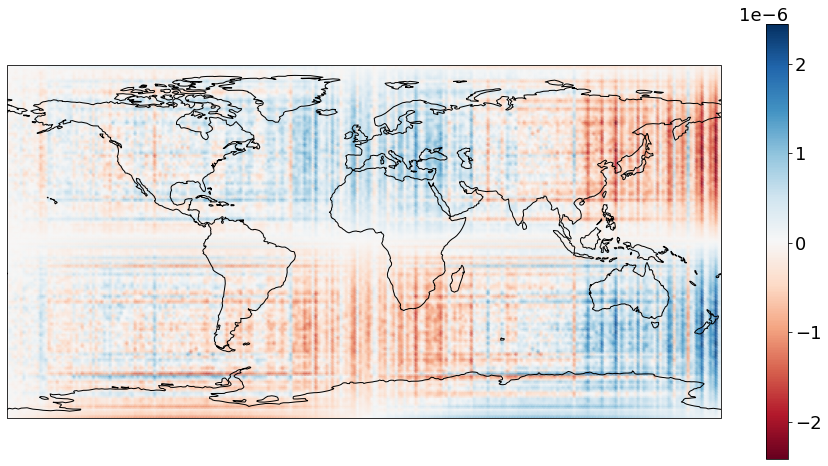

In [136]:
def psi_calc(om,L = 2):
    psi = pysh.SHGrid.from_zeros(lmax=L,grid='GLQ')
    ilat = 0
    for lat in psi.lats():
        ilon = 0
        for lon in psi.lons():
            psi.data[ilat,ilon] = SL.centrifugal_perturbation_value(om,lat,lon)
            ilon += 1
        ilat += 1
    return psi


L = 128
om = np.zeros(2)
om[1] = 1
psi = psi_calc(om,L)
SL.plot(psi)

psi_lm = pysh.SHCoeffs.from_zeros(lmax=L,normalization = 'ortho')
psi_lm.coeffs[:,2,:3] = SL.centrifugal_perturbation_coefficients(om)
psi2 = psi_lm.expand(grid='GLQ')
SL.plot(psi-psi2)


In [141]:
L=128
sl0,ice0 = SL.get_sl_ice_data(L)
sigma = SL.rhoi*ice0

def phi_2m_calc(sigma):
    phi_lm = sigma.expand(normalization = 'ortho')
    phi_2m = np.zeros((2,3))
    fac = -4*pi*SL.G*SL.b/5
    phi_2m = fac*phi_lm.coeffs[:,2,:3]
    return phi_2m

phi_2m = phi_2m_calc(sigma)





def inertia_calc(sigma):
    
    f = sigma.copy()
    ilat = 0
    for lat in f.lats():
        ilon = 0
        th = (90-lat)*(pi/180)
        for lon in f.lons():
            ph = lon*pi/180
            x = SL.b*np.sin(th)*np.cos(ph)
            y = SL.b*np.sin(th)*np.sin(ph)
            z = SL.b*np.cos(th)
            f.data[ilat,ilon] *= -x*z
            ilon += 1
        ilat += 1
    return SL.surface_integral(f)
  
v1 = inertia_calc(sigma)
   
sigma_lm = sigma.expand(normalization='ortho')        
    
    
#v2 = np.sqrt(3/(20*pi))*(SL.b**3/SL.G)*phi_2m[0,1]
 
v2 = -np.sqrt((4*pi)/15)*SL.b**4*sigma_lm.coeffs[0,2,1]    
    
print(v1/v2)


def inertia_test(L):
    
    f = pysh.SHGrid.from_zeros(lmax=L,grid = 'GLQ')
    ilat = 0
    for lat in f.lats():
        ilon = 0
        th = (90-lat)*(pi/180)
        for lon in f.lons():
            ph = lon*pi/180
            x = SL.b*np.sin(th)*np.cos(ph)
            y = SL.b*np.sin(th)*np.sin(ph)
            z = SL.b*np.cos(th)
            f.data[ilat,ilon] = -x*z
            ilon += 1
        ilat += 1
    return f.expand(normalization = 'ortho')

ilm = inertia_test(L)
fac = -np.sqrt(4*pi/15)*SL.b**2
print(ilm.coeffs[0,2,1]/fac)


0.9999999999999968
0.9999999999999996
